Carga y Visualización de Datos

Train DataFrame shape: (159571, 8)

Train Data Head:
                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  

Valores nulos por columna en train:
id               0
comment_text     0
toxic            0
severe_toxic     0

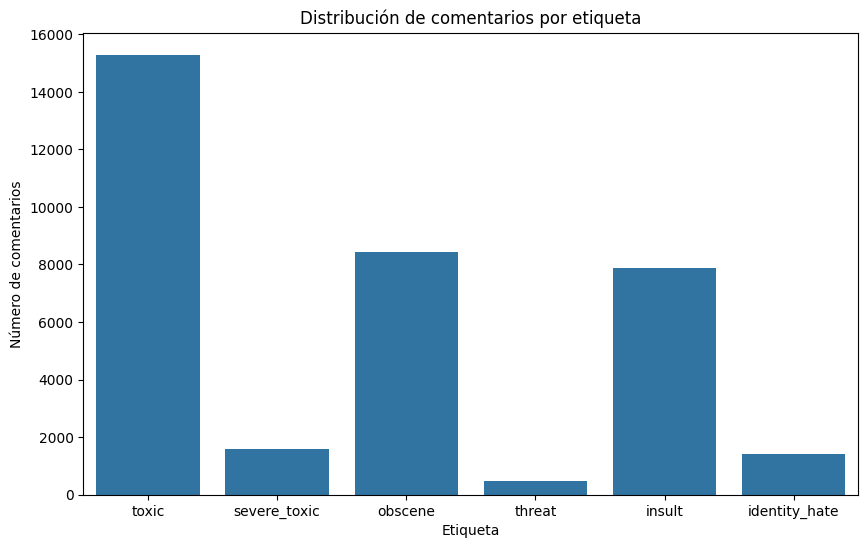

In [37]:
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Dataset/train.csv')

print("Train DataFrame shape:", df.shape)

print("\nTrain Data Head:")
print(df.head())

print("\nValores nulos por columna en train:")
print(train_df.isnull().sum())

label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
print("\nDistribución de etiquetas en el dataset de entrenamiento:")
print(df[label_cols].sum().sort_values(ascending=False))

plt.figure(figsize=(10,6))
sns.barplot(x=df[label_cols].sum().index, y=df[label_cols].sum().values)
plt.title('Distribución de comentarios por etiqueta')
plt.ylabel('Número de comentarios')
plt.xlabel('Etiqueta')
plt.show()

Capítulo 1

In [38]:
# Selecciona un comentario de ejemplo
comentario = df.loc[0, 'comment_text']
print("Comentario de ejemplo:\n", comentario)

# Tokenización sencilla: separar por espacios
tokens = comentario.split()
print("\nTokens:\n", tokens)
print(f"\nNúmero de tokens en este comentario: {len(tokens)}")

Comentario de ejemplo:
 Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27

Tokens:
 ['Explanation', 'Why', 'the', 'edits', 'made', 'under', 'my', 'username', 'Hardcore', 'Metallica', 'Fan', 'were', 'reverted?', 'They', "weren't", 'vandalisms,', 'just', 'closure', 'on', 'some', 'GAs', 'after', 'I', 'voted', 'at', 'New', 'York', 'Dolls', 'FAC.', 'And', 'please', "don't", 'remove', 'the', 'template', 'from', 'the', 'talk', 'page', 'since', "I'm", 'retired', 'now.89.205.38.27']

Número de tokens en este comentario: 43


In [39]:
# Tokenizar todos los comentarios usando split()
todos_tokens = []
for text in df['comment_text']:
    todos_tokens.extend(text.split())

# Cálculos básicos
total_tokens = len(todos_tokens)
vocabulario = set(todos_tokens)
num_types = len(vocabulario)

print(f"Total de tokens en el corpus: {total_tokens}")
print(f"Número de tipos de tokens distintos: {num_types}")

Total de tokens en el corpus: 10734904
Número de tipos de tokens distintos: 532299


In [47]:
def lexical_diversity(tokens):
    """Retorna la diversidad léxica: número de tipos dividido por número de tokens"""
    return len(set(tokens)) / len(tokens)

def percentage(count, total):
    """Retorna el porcentaje que representa count sobre total"""
    return 100 * count / total

# Diversidad léxica global
div_global = lexical_diversity(todos_tokens)
# Porcentaje de la palabra 'toxic' en el corpus
count_toxic = todos_tokens.count('nigger')
porc_toxic = percentage(count_toxic, total_tokens)

print(f"Diversidad léxica global: {div_global:.4f}")
print(f"Apariciones de 'nigger': {count_toxic} ({porc_toxic:.4f}% del corpus)")

Diversidad léxica global: 0.0496
Apariciones de 'nigger': 692 (0.0064% del corpus)


In [82]:
from nltk.text import Text
# Crear un objeto Text a partir de la lista de tokens
text_nltk = Text(todos_tokens)
# Mostrar concordancias de la palabra 'toxic'
text_nltk.concordance('nigger')

Displaying 25 of 3251 matches:
 warning then you fucking block me, nigger cunt eat pussy bitch Bob Parsons Th
ith its liberal defenders, FUCK YOU NIGGER OBOAMA! List of FNL awards and noms
ple. In my holy opinion, there is a nigger inside of all of us. People (like y
and mexicans try to compete with da nigger Gs but we r too strong. but in real
son, you suck. Stop being so white. Nigger pride. -(non-white person) " A case
 Are you a gay nigger? Then the Gay Nigger Association of America is right for
suggestions now. IN THE anus with a nigger dick in it.68.33.41.181 The use of 
 all for your input ) Fan-1967 is a nigger licker Fan-1967 is a nigger licker 
67 is a nigger licker Fan-1967 is a nigger licker Fan-1967 is a nigger licker 
67 is a nigger licker Fan-1967 is a nigger licker Fan-1967 is a nigger licker 
67 is a nigger licker Fan-1967 is a nigger licker Fan-1967 is a nigger licker 
67 is a nigger licker Fan-1967 is a nigger licker Fan-1967 is a nigger licker 
67 is a nigger licker

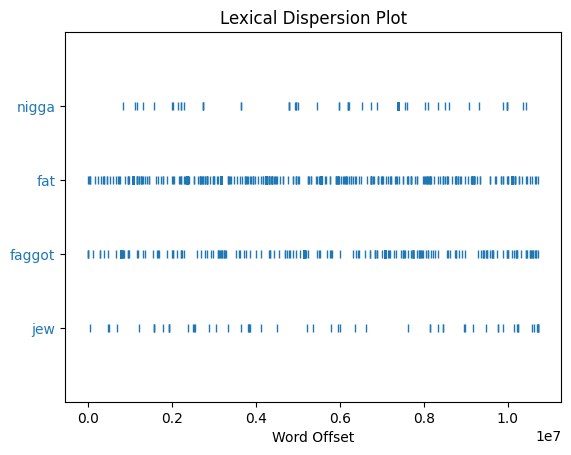

In [56]:
# Para visualizar tendencias de uso de ciertas palabras
environment = Text(todos_tokens)
%matplotlib inline
environment.dispersion_plot(['nigga', 'fat', 'faggot', 'jew'])

In [61]:
# Tomemos un comentario de ejemplo y representémoslo como lista de palabras
comentario1 = df.loc[0, 'comment_text']
print("Comentario 1:", comentario1)
# Tokenización sencilla: split por espacios
tokens1 = comentario1.split()
print(f"Lista de tokens (primeros 20): {tokens1[:20]}")

Comentario 1: Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27
Lista de tokens (primeros 20): ['Explanation', 'Why', 'the', 'edits', 'made', 'under', 'my', 'username', 'Hardcore', 'Metallica', 'Fan', 'were', 'reverted?', 'They', "weren't", 'vandalisms,', 'just', 'closure', 'on', 'some']


In [66]:
# 4.1 Longitud y conteo de un token
print(f"Número de tokens en comentario1: {len(tokens1)}")
print(f"Apariciones de la palabra 'Hardcore': {tokens1.count('Hardcore')}")

# 4.2 Concatenación de listas: unir dos comentarios
comentario2 = df.loc[1, 'comment_text']
tokens2 = comentario2.split()
tokens_concat = tokens1 + tokens2
print(f"Longitud combinada de tokens: {len(tokens_concat)}")

# 4.3 Append: añadir un token al final
tokens1_copy = tokens1.copy()
tokens1_copy.append('<END>')
print(f"Últimos 5 tokens después de append: {tokens1_copy[-5:]}")

Número de tokens en comentario1: 43
Apariciones de la palabra 'Hardcore': 1
Longitud combinada de tokens: 60
Últimos 5 tokens después de append: ['since', "I'm", 'retired', 'now.89.205.38.27', '<END>']


In [71]:
# 5.1 Obtener el token en una posición concreta (e.g., la posición 10)
if len(tokens1) > 10:
    print(f"Token en posición 10: {tokens1[10]}")

# 5.2 Encontrar índice de la primera ocurrencia de 'toxic' (si existe)
if 'Fan' in tokens_concat:
    idx = tokens_concat.index('Fan')
    print(f"Primera ocurrencia de 'Fan' en tokens_concat en el índice: {idx}")

# 5.3 Slicing: obtener ventana de 5 tokens alrededor de esa posición
    start = max(idx - 2, 0)
    end = idx + 3
    print(f"Contexto alrededor de 'toxic': {tokens_concat[start:end]}")

Token en posición 10: Fan
Primera ocurrencia de 'Fan' en tokens_concat en el índice: 10
Contexto alrededor de 'toxic': ['Hardcore', 'Metallica', 'Fan', 'were', 'reverted?']


In [72]:
# Guardamos tipos y token counts como variables
total_tokens = len(tokens_concat)
distinct_types = len(set(tokens_concat))

print(f"Total de tokens combinados: {total_tokens}")
print(f"Número de tipos distintos en tokens_concat: {distinct_types}")

Total de tokens combinados: 60
Número de tipos distintos en tokens_concat: 57


In [73]:
# Tomemos el primer token y veamos operaciones de string
word = tokens1[0] if tokens1 else ''
print(f"Primer token: {word}")

# 7.1 Indexación de caracteres
if len(word) >= 1:
    print(f"Primer caracter de '{word}': {word[0]}")

# 7.2 Slicing de string
print(f"Primeros 4 caracteres de '{word}': {word[:4]}")

# 7.3 Multiplicación y concatenación de strings
print(f"Duplicar word: {word * 2}")
print(f"Añadir exclamación: {word + '!'}")

# 7.4 Unir lista de tokens en string y volver a splitear
joined = ' '.join(tokens1[:10])
print(f"Joined (primeros 10 tokens): {joined}")
print(f"Split de nuevo: {joined.split()}" )

Primer token: Explanation
Primer caracter de 'Explanation': E
Primeros 4 caracteres de 'Explanation': Expl
Duplicar word: ExplanationExplanation
Añadir exclamación: Explanation!
Joined (primeros 10 tokens): Explanation Why the edits made under my username Hardcore Metallica
Split de nuevo: ['Explanation', 'Why', 'the', 'edits', 'made', 'under', 'my', 'username', 'Hardcore', 'Metallica']


In [76]:
from nltk.probability import FreqDist

# Asumiendo todos_tokens como la lista de tokens global creada en Capítulo 1
dist_freq = FreqDist(todos_tokens)
print(dist_freq)

# Mostrar las 20 palabras más frecuentes
print(dist_freq.most_common(20))

# Frecuencia del token 'nigger'
print(f"Apariciones de 'nigger': {dist_freq['nigger']}")

<FreqDist with 532299 samples and 10734904 outcomes>
[('the', 445987), ('to', 288817), ('of', 219334), ('and', 207381), ('a', 201817), ('I', 183930), ('is', 164639), ('you', 157272), ('that', 140545), ('in', 130262), ('for', 96010), ('it', 92651), ('on', 84453), ('not', 83944), ('"', 81755), ('be', 80928), ('this', 71429), ('have', 69414), ('as', 68345), ('are', 66277)]
Apariciones de 'nigger': 692


In [77]:
hapaxes = dist_freq.hapaxes()
print(f"Número de hapaxes: {len(hapaxes)}")
print(f"Ejemplos de hapaxes: {hapaxes[:20]}")

Número de hapaxes: 348064
Ejemplos de hapaxes: ['now.89.205.38.27', "D'aww!", 'Wikipedia:Good_article_nominations#Transport', 'Shirvington', 'article(wow', "'animal", "breeding'", 'eugenics?', 'it-maybe', 'phone?', 'TALIBANS...who', '(non)-contribution', 'itself-making', 'relevant-this', 'ex-president', 'aircracft', 'liberally.', 'Yvesnimmo.', 'Santanas', 'Diplomats.']


In [81]:
# Palabras del vocabulario con más de 15 caracteres
vocab = set(todos_tokens)
long_palabras = [w for w in vocab if len(w) > 15]
print(sorted(long_palabras[:10]))

# Palabras con longitud > 7 y frecuencia > 7
freq_largas = sorted(w for w in vocab if len(w) > 7 and dist_freq[w] > 7)
print(freq_largas[:10])

['""Extracurriculur""', '(Baseball-Reference.com)', '1|#FFFF00|white||This', 'TABMüngersdorferstadion', 'anti-circumcision.', 'appreciated.But,', 'common-knowledge', 'holier-than-thou,', 'http://www.ahherald.com/images/news/2004/anarchy.jpg', 'troll/nazi/zealot,']
['!align=""center""', '!style=""background:', '""...and', '""...the', '""According', '""African', '""Alexander', '""Allegations', '""Alternative', '""Although']


In [79]:
from nltk import bigrams

# Ejemplo de bigramas en el primer comentario
tokens_ej = tokens1[:10]
print(list(bigrams(tokens_ej)))

# Collocations en el corpus completo
text_nltk.collocations()

[('Explanation', 'Why'), ('Why', 'the'), ('the', 'edits'), ('edits', 'made'), ('made', 'under'), ('under', 'my'), ('my', 'username'), ('username', 'Hardcore'), ('Hardcore', 'Metallica')]
talk page; Thank you.; NIGGER NIGGER; talk page.; PIG PIG; JEW FAT;
FAT JEW; LOL LOL; speedy deletion; four tildes; Bark Bark; would like;
speedy deletion,; fair use; WANKER WANKER; fish fish; five pillars;
talk page,; tildes (~~~~);; BALLS BALLS


In [83]:
# Crear FreqDist de las longitudes de los tokens
fd_len = FreqDist(len(w) for w in todos_tokens)

# Los 10 tamaños de palabra más comunes
print(fd_len.most_common(10))

# Tamaño de palabra más frecuente y su frecuencia
max_len = fd_len.max()
print(f"Longitud más común: {max_len} ({fd_len[max_len]} tokens)")
print(f"Proporción de longitud {max_len}: {fd_len.freq(max_len):.4f}")

[(3, 1996396), (4, 1813981), (2, 1754160), (5, 1137058), (6, 863858), (7, 819354), (8, 601516), (1, 588287), (9, 424726), (10, 291447)]
Longitud más común: 3 (1996396 tokens)
Proporción de longitud 3: 0.1860


In [84]:
# Seleccionar tokens cortos (menos de 4 caracteres) en un comentario de ejemplo
tokens_short = [w for w in tokens1 if len(w) < 4]
print(f"Tokens con longitud < 4: {tokens_short}")

# Seleccionar tokens con longitud exactamente 4
tokens_eq4 = [w for w in tokens1 if len(w) == 4]
print(f"Tokens con longitud == 4: {tokens_eq4}")

# Seleccionar tokens con longitud distinta de 4
tokens_not4 = [w for w in tokens1 if len(w) != 4]
print(f"Tokens con longitud != 4 (primeros 10): {tokens_not4[:10]}")

Tokens con longitud < 4: ['Why', 'the', 'my', 'Fan', 'on', 'GAs', 'I', 'at', 'New', 'And', 'the', 'the', "I'm"]
Tokens con longitud == 4: ['made', 'were', 'They', 'just', 'some', 'York', 'FAC.', 'from', 'talk', 'page']
Tokens con longitud != 4 (primeros 10): ['Explanation', 'Why', 'the', 'edits', 'under', 'my', 'username', 'Hardcore', 'Metallica', 'Fan']


In [85]:
# Tokens que empiezan con mayúscula (istitle)
tokens_title = [w for w in set(todos_tokens) if w.istitle()]
print(f"Tokens con titulo (istitle), ejemplos: {tokens_title[:20]}")

# Tokens que contienen dígitos (isdigit o any)
tokens_digits = [w for w in set(todos_tokens) if w.isdigit()]
print(f"Tokens numéricos: {tokens_digits}")

# Tokens alfanuméricos (isalpha)
tokens_alpha = [w for w in set(todos_tokens) if w.isalpha()]
print(f"Número de tokens alfabéticos: {len(tokens_alpha)}")

Tokens con titulo (istitle), ejemplos: ['Norway.', '""Destiny', 'Portal-Class,', 'Lavoie', 'Ostrogski', 'Laçka', 'Synth.', 'Berlet', 'Deffinatly', 'Zsolt', "O'Sullivan", 'Endorsements', '""Extracurriculur""', 'Watcher,', 'Ink,', 'Voynich', 'Cyzygy', 'Kolisevski.', 'Sunderland', 'Rumsfeld']
Tokens numéricos: ['2407', '1259', '322', '1815', '1476', '1979', '161', '71224', '1718', '100013400624', '1930', '217', '1885', '707', '531', '1955', '1215', '00164', '5700', '27', '1620', '03235', '26810', '5000', '282', '753', '8175361840', '2409', '118', '846', '619', '1300', '1052', '2492', '15619190', '2929', '2773', '276', '117', '1873', '80386', '7073189467', '377', '1931', '127', '04980', '0011', '1563', '85635', '93550', '247246', '3200', '461', '90210', '633', '360', '1402', '725', '1804', '4320', '1000000000', '14', '104', '3750', '1640', '1865', '86000', '1713', '452672700', '791', '1874', '292370091', '24079683', '292265970', '2360', '0932', '1841', '1911', '1450', '800', '232407407', '

In [ ]:
# Contar y listar tokens que contienen la subcadena 'nigger'
count_sub = 0
for w in todos_tokens:
    if 'nigger' in w.lower():
        count_sub += 1
print(f"Tokens que contienen 'nigger' (case-insensitive): {count_sub}")

# Imprimir tokens que terminen en 'ing' (primeros 20)
printed = 0
for w in todos_tokens:
    if w.lower().endswith('ing'):
        print(w, end=' ')
        printed += 1
        if printed >= 20:
            break
print()

Tokens que contienen 'nigger' (case-insensitive): 3532
trying removing talking formatting tidying formatting intending anything requesting breeding uploading being using checking clicking selecting lacking uploading adding licensing 


In [87]:
#Clasificar tokens según tipo: dígito, alfabético o mixto
for w in set(tokens1):
    if w.isdigit():
        print(f"{w} es un token numérico")
    elif w.isalpha():
        print(f"{w} es un token alfabético")
    else:
        print(f"{w} es mixto o contiene puntuación")

Dolls es un token alfabético
I'm es mixto o contiene puntuación
after es un token alfabético
from es un token alfabético
now.89.205.38.27 es mixto o contiene puntuación
Why es un token alfabético
the es un token alfabético
made es un token alfabético
weren't es mixto o contiene puntuación
were es un token alfabético
at es un token alfabético
And es un token alfabético
reverted? es mixto o contiene puntuación
GAs es un token alfabético
edits es un token alfabético
page es un token alfabético
template es un token alfabético
my es un token alfabético
username es un token alfabético
on es un token alfabético
retired es un token alfabético
talk es un token alfabético
please es un token alfabético
York es un token alfabético
Metallica es un token alfabético
vandalisms, es mixto o contiene puntuación
I es un token alfabético
They es un token alfabético
since es un token alfabético
FAC. es mixto o contiene puntuación
Fan es un token alfabético
closure es un token alfabético
New es un token alf